In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import scipy.signal as signal
from log_processing import process_log 

In [6]:
log_file = "../backtests/test.log"

trader_data, products_data, activities, trades = process_log(log_file)

In [7]:
kelp = products_data["KELP"]
activities = activities[activities["product"] == "KELP"]

In [8]:
price = kelp["mm_fair"].values
price = price[~np.isnan(price)]

/var/folders/4_/nj45w49n4nq1x2nm00vm98dw0000gn/T/ipykernel_30698/3980419141.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][window_short:] = np.where(signals['short_ma'][window_short:] > signals['long_ma'][window_short

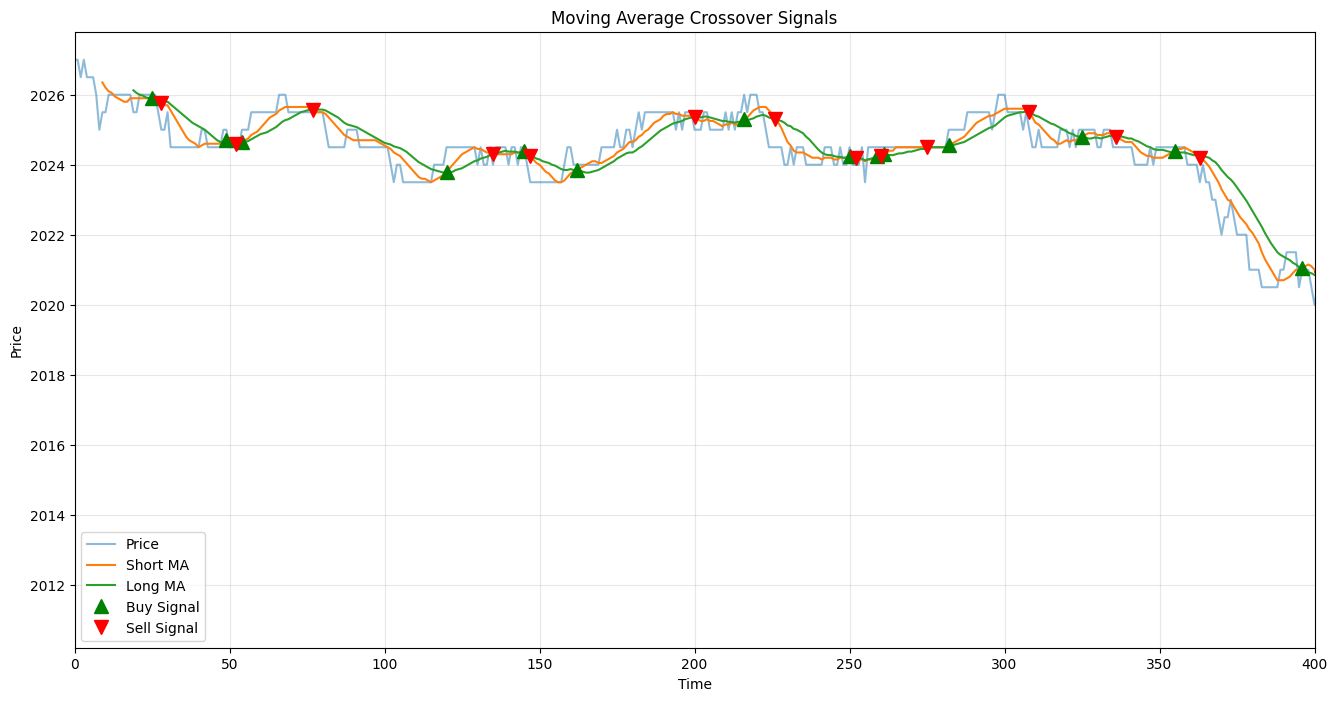

In [21]:
# Convert to pandas Series if it's not already
price_series = pd.Series(price)

window_short = 10
window_long = 20

# Calculate Simple Moving Averages with different window sizes
sma_short = price_series.rolling(window=window_short).mean()
sma_long = price_series.rolling(window=window_long).mean()


# Create signals based on SMA crossovers
signals = pd.DataFrame(index=price_series.index)

signals['price'] = price_series
signals['short_ma'] = sma_short
signals['long_ma'] = sma_long
signals['signal'] = 0.0

# Create buy/sell signals when short MA crosses long MA
signals['signal'][window_short:] = np.where(signals['short_ma'][window_short:] > signals['long_ma'][window_short:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

# Plot signals
plt.figure(figsize=(16, 8))
plt.plot(price_series, label='Price', alpha=0.5)
plt.plot(signals['short_ma'], label='Short MA')
plt.plot(signals['long_ma'], label='Long MA')

# Plot buy signals
plt.plot(signals.loc[signals['positions'] == 1.0].index, 
         signals.loc[signals['positions'] == 1.0]['short_ma'],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(signals.loc[signals['positions'] == -1.0].index, 
         signals.loc[signals['positions'] == -1.0]['short_ma'],
         'v', markersize=10, color='r', label='Sell Signal')

plt.legend()
plt.title('Moving Average Crossover Signals')
plt.xlabel('Time')
plt.xlim([0, 400])
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.show()
